# Import and data preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu, t
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Initial analysis 

In [4]:
data = pd.read_csv('merged_v2.csv')

data = data.drop(columns=['Maximum Drawdown (MDD)','Unrealized ROI (%)'])

data['Total_Transactions'] = pd.to_numeric(data['Total_Transactions'], errors='coerce')

data = data.dropna(subset=['Total_Transactions'])

data = data[data['Total_Transactions'] <= 1000.0]

data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34558 entries, 304 to 34861
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Address                        34558 non-null  object 
 1   Transaction_ROI                34558 non-null  float64
 2   Market_ROI                     34558 non-null  float64
 3   PnL                            34558 non-null  float64
 4   Total_Transactions             34558 non-null  int64  
 5   Alpha                          34558 non-null  float64
 6   Biggest Winning Trade          34558 non-null  float64
 7   Biggest Losing Trade           34558 non-null  float64
 8   Consecutive Wins               34558 non-null  int64  
 9   Average Holding Period (days)  34558 non-null  float64
 10  % of Match                     34558 non-null  float64
 11  Min Cycle Count                34558 non-null  int64  
 12  Max Cycle Count                34558 non-nul

(None,
                                 Address  Transaction_ROI    Market_ROI  \
 304  3EUC1DfLuBw6Quk9uqud6MDkZwGL2x4DQF         3.422341   1670.363798   
 305  1MnUw7R9Rj7RqTaZqL9RQSAcpdEqixRrLw         0.020618     15.651438   
 306  179o4fk3w3qVwNWL3EdKQfpohpxsmkLuR5         0.945384  14264.828060   
 307  13L9sg68DLbeMqQS1dEPAtjN8xKyAS7QjY        -0.655868    291.976659   
 308  1GQyBcAus9j8rsJRYZjVN1n3Ch7GJvzCEp         4.261873   2951.262399   
 
                PnL  Total_Transactions         Alpha  Biggest Winning Trade  \
 304  687751.537600                1000  -1666.941457           1.883673e+06   
 305     480.291597                 994    -15.630820           8.385103e+04   
 306    8996.453665                 983 -14263.882680           4.414229e+04   
 307  -76455.211100                 976   -292.632527           1.040000e+06   
 308  262008.305100                 971  -2947.000526           5.139414e+05   
 
      Biggest Losing Trade  Consecutive Wins  Average Holdi

In [5]:
data.columns = data.columns.str.replace("_", " ")
data.describe()

,Transaction ROI,Market ROI,PnL,Total Transactions,Alpha,Biggest Winning Trade,Biggest Losing Trade,Consecutive Wins,Average Holding Period (days),% of Match,Min Cycle Count,Max Cycle Count,Last Balance,Max Balance,Min Balance
count,3.455800e+04,3.455800e+04,3.455800e+04,34558.000000,3.455800e+04,3.455800e+04,3.455800e+04,34558.000000,34558.000000,34558.000000,34558.000000,34558.000000,3.455800e+04,3.455800e+04,3.455800e+04
mean,1.908429e+03,2.409631e+03,3.146528e+06,18.713525,-5.012025e+02,4.605828e+07,4.167628e+07,3.750564,23.927236,54.304128,4.682534,4.875514,5.362864e+09,3.131338e+11,2.562030e+08
std,1.043653e+05,1.154698e+05,7.874277e+07,68.959132,4.820689e+04,1.225595e+08,1.175978e+08,13.761466,56.825861,20.389846,1.708154,1.696291,1.524358e+11,7.934811e+11,8.030539e+09
min,-1.000000e+02,-9.031085e+01,-4.878846e+09,2.000000,-5.684102e+06,5.000000e-03,8.444000e-06,0.000000,0.004132,0.000000,1.000000,1.000000,0.000000e+00,9.411280e+05,0.000000e+00
25%,-2.364627e+00,-2.277781e+00,-1.085897e+05,2.000000,-5.624960e-07,6.090000e+05,9.198788e+04,1.000000,1.000000,50.000000,4.000000,4.000000,0.000000e+00,1.143792e+11,0.000000e+00
50%,1.619493e+00,2.826129e+00,1.291864e+04,2.000000,0.000000e+00,8.583873e+06,3.870300e+06,1.000000,3.000000,50.000000,5.000000,5.000000,0.000000e+00,1.700101e+11,0.000000e+00
75%,1.635904e+01,2.772510e+01,1.519146e+06,6.000000,0.000000e+00,5.288755e+07,4.639442e+07,3.000000,17.000000,66.666667,6.000000,7.000000,0.000000e+00,2.957074e+11,0.000000e+00
max,1.068247e+07,1.471325e+07,5.033372e+09,1000.000000,5.037255e+06,7.610968e+09,7.610968e+09,769.000000,1722.333333,100.000000,7.000000,8.000000,1.560101e+13,4.966516e+13,9.049832e+11


## Scatter Market_ROI vs Transaction_ROI

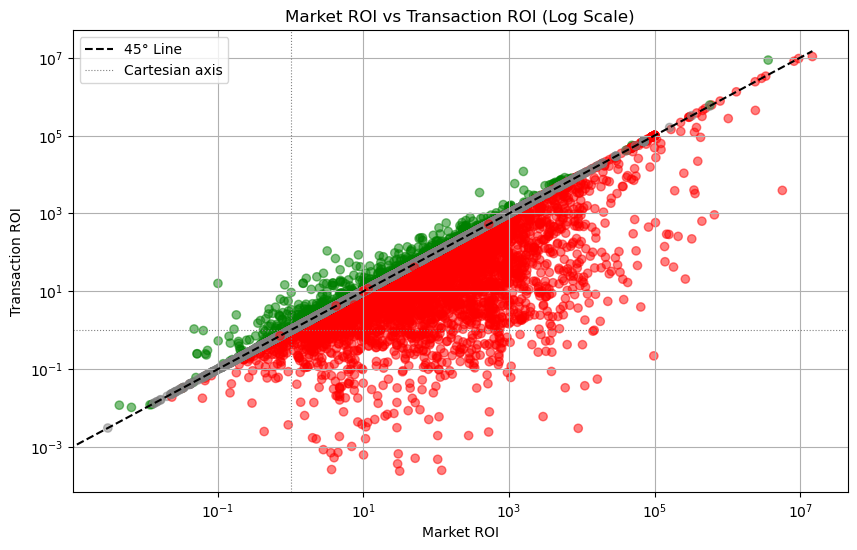

In [7]:
data_scatter_market_transaction = data[data['Transaction ROI'] >= 1e-4]

x = data_scatter_market_transaction['Market ROI']
y = data_scatter_market_transaction['Transaction ROI']

line = np.linspace(min(x.min(), y.min()), max(x.max(), y.max()), 100)

colors = np.where(y > x, 'green', np.where(y < x, 'red', 'grey'))

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(x, y, c=colors, alpha=0.5)
ax.plot(line, line, color='black', linestyle='--', label='45° Line')
ax.set_title('Market ROI vs Transaction ROI (Log Scale)')
ax.set_xlabel('Market ROI')
ax.set_ylabel('Transaction ROI')

ax.set_xscale('log')
ax.set_yscale('log')

ax.axhline(y=1, color='gray', linestyle=':', linewidth=0.8)
ax.axvline(x=1, color='gray', linestyle=':', linewidth=0.8, label='Cartesian axis')

ax.grid()
ax.legend()
# plt.savefig("Market ROI vs Transaction ROI (Log Scale).pdf")

plt.show()

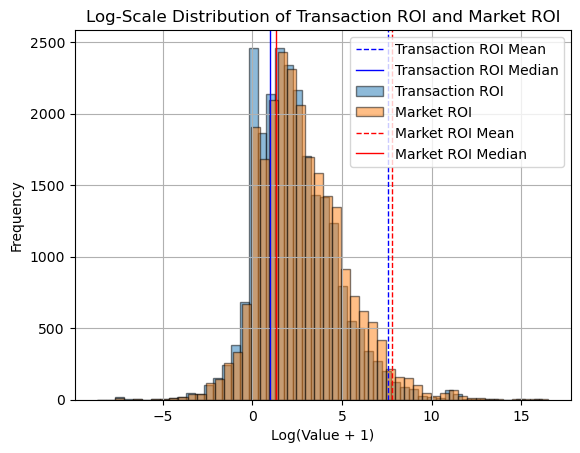

In [8]:
transaction_mean = data['Transaction ROI'].mean()
transaction_median = data['Transaction ROI'].median()
market_mean = data['Market ROI'].mean()
market_median = data['Market ROI'].median()

plt.axvline(np.log(transaction_mean + 1), color='blue', linestyle='dashed', linewidth=1, label='Transaction ROI Mean')
plt.axvline(np.log(transaction_median + 1), color='blue', linestyle='solid', linewidth=1, label='Transaction ROI Median')

plt.hist(
    data['Transaction ROI'].apply(lambda x: np.log(x + 1)), 
    bins=50, 
    edgecolor='k', 
    alpha=0.5, 
    label='Transaction ROI'
)

plt.hist(
    data['Market ROI'].apply(lambda x: np.log(x + 1)), 
    bins=50, 
    edgecolor='k', 
    alpha=0.5, 
    label='Market ROI'
)

plt.axvline(np.log(market_mean + 1), color='red', linestyle='dashed', linewidth=1, label='Market ROI Mean')
plt.axvline(np.log(market_median + 1), color='red', linestyle='solid', linewidth=1, label='Market ROI Median')

plt.title('Log-Scale Distribution of Transaction ROI and Market ROI')
plt.xlabel('Log(Value + 1)')
plt.ylabel('Frequency')
plt.legend()  
plt.grid()

# plt.savefig("Log-Scale Distribution of Transaction ROI and Market ROI.pdf") 

plt.show()

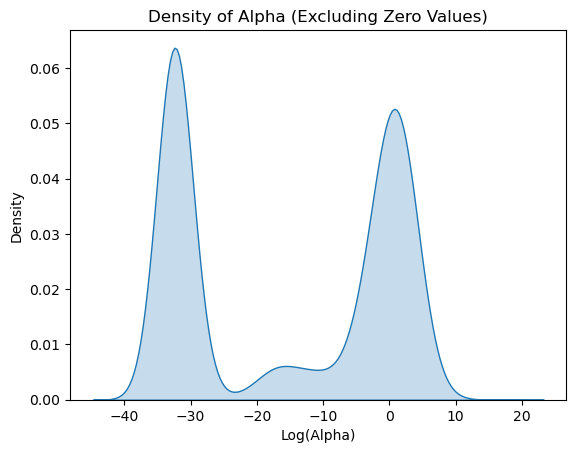

In [9]:
alpha_nonzero = data[data['Alpha'] != 0]

sns.kdeplot(alpha_nonzero['Alpha'].apply(lambda x: np.log(x)), fill=True)

plt.xlabel("Log(Alpha)")
plt.ylabel("Density")
plt.title("Density of Alpha (Excluding Zero Values)")

# plt.savefig("Density of Alpha (Excluding Zero Values).pdf") 

plt.show()

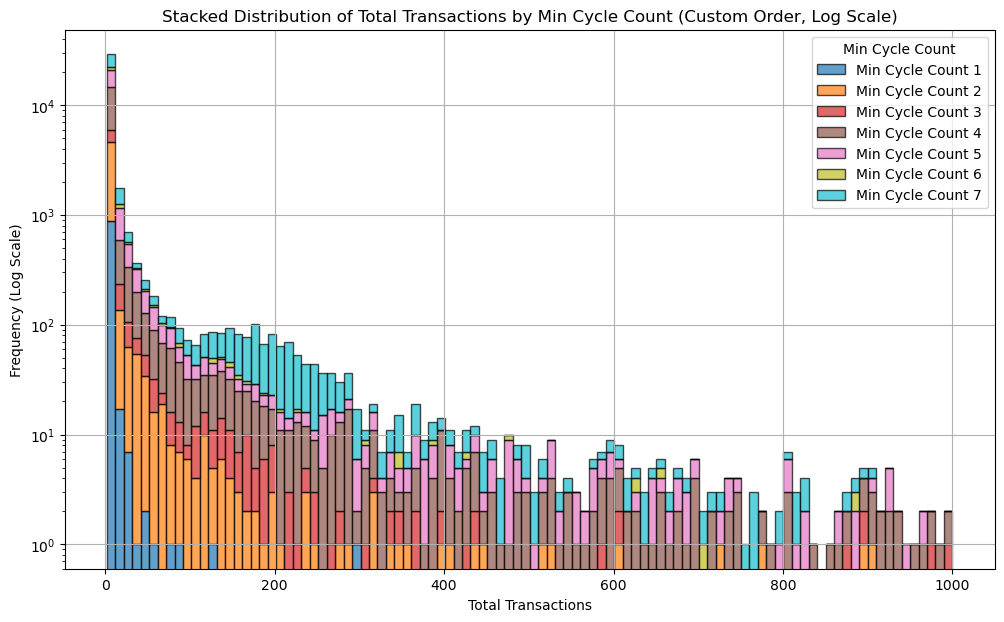

In [10]:
sorted_min_cycle_counts = sorted(data['Min Cycle Count'].unique())
stacked_data_sorted = [data[data['Min Cycle Count'] == count]['Total Transactions'] for count in sorted_min_cycle_counts]

colors = plt.cm.tab10(np.linspace(0, 1, len(sorted_min_cycle_counts)))

plt.figure(figsize=(12, 7))
plt.hist(stacked_data_sorted, bins=100, alpha=0.7, 
         label=[f'Min Cycle Count {count}' for count in sorted_min_cycle_counts], 
         color=colors, edgecolor='k', stacked=True)

plt.yscale('log')
plt.title('Stacked Distribution of Total Transactions by Min Cycle Count (Custom Order, Log Scale)')
plt.xlabel('Total Transactions')
plt.ylabel('Frequency (Log Scale)')
plt.legend(title='Min Cycle Count', loc='upper right')
plt.grid()
plt.show()

In [11]:
bins = pd.cut(data['Total Transactions'], bins=[-1, 10, 20, 50, 100, float('inf')], labels=['0-10', '11-20', '21-50', '51-100', '>100'])

data['Transaction Bin'] = bins

def calculate_alpha_percentage(df, market_condition):
    result = {}
    for bin_range in df['Transaction Bin'].unique():
        if pd.isna(bin_range):  # Skip NaN bins (if any)
            continue
        bin_data = df[df['Transaction Bin'] == bin_range]
        filtered_data = bin_data[market_condition(bin_data)]
        total_count = filtered_data.shape[0]
        positive_alpha_count = filtered_data[filtered_data['Alpha'] > 0].shape[0]
        percentage = (positive_alpha_count / total_count) * 100 if total_count > 0 else 0
        result[bin_range] = percentage
    return result

negative_market_condition = lambda df: df['Market ROI'] < 0
positive_market_condition = lambda df: df['Market ROI'] > 0

negative_alpha_percentages = calculate_alpha_percentage(data, negative_market_condition)
positive_alpha_percentages = calculate_alpha_percentage(data, positive_market_condition)

result_df = pd.DataFrame({
    'Transaction Bin': list(negative_alpha_percentages.keys()),
    'Alpha % (Market Negative)': list(negative_alpha_percentages.values()),
    'Alpha % (Market Positive)': list(positive_alpha_percentages.values())
})

result_df = result_df.sort_values('Transaction Bin')

def normalize_percentages(percentages):
    total = sum(percentages.values())
    if total == 0:
        return {k: 0 for k in percentages}
    return {k: (v / total) * 100 for k, v in percentages.items()}

normalized_negative_alpha_percentages = normalize_percentages(negative_alpha_percentages)
normalized_positive_alpha_percentages = normalize_percentages(positive_alpha_percentages)

normalized_result_df = pd.DataFrame({
    'Transaction Bin': list(normalized_negative_alpha_percentages.keys()),
    'Alpha % (Market Negative)': list(normalized_negative_alpha_percentages.values()),
    'Alpha % (Market Positive)': list(normalized_positive_alpha_percentages.values())
})

normalized_result_df = normalized_result_df.sort_values('Transaction Bin')
normalized_result_df

,Transaction Bin,Alpha % (Market Negative),Alpha % (Market Positive)
4,0-10,9.205378,29.716751
3,11-20,20.322543,29.992223
2,21-50,21.800546,14.585513
1,51-100,24.041359,15.389596
0,>100,24.630174,10.315917


In [12]:
def calculate_negative_alpha_percentage(df, market_condition):
    result = {}
    for bin_range in df['Transaction Bin'].unique():
        if pd.isna(bin_range):  # Skip NaN bins (if any)
            continue
        bin_data = df[df['Transaction Bin'] == bin_range]
        filtered_data = bin_data[market_condition(bin_data)]
        total_count = filtered_data.shape[0]
        negative_alpha_count = filtered_data[filtered_data['Alpha'] < 0].shape[0]
        percentage = (negative_alpha_count / total_count) * 100 if total_count > 0 else 0
        result[bin_range] = percentage
    return result

negative_alpha_percentages = calculate_negative_alpha_percentage(data, negative_market_condition)
positive_alpha_percentages = calculate_negative_alpha_percentage(data, positive_market_condition)

normalized_negative_alpha_percentages = normalize_percentages(negative_alpha_percentages)
normalized_positive_alpha_percentages = normalize_percentages(positive_alpha_percentages)

negative_alpha_result_df = pd.DataFrame({
    'Transaction Bin': list(normalized_negative_alpha_percentages.keys()),
    'Alpha % (Market Negative)': list(normalized_negative_alpha_percentages.values()),
    'Alpha % (Market Positive)': list(normalized_positive_alpha_percentages.values())
})

negative_alpha_result_df = negative_alpha_result_df.sort_values('Transaction Bin')
negative_alpha_result_df

,Transaction Bin,Alpha % (Market Negative),Alpha % (Market Positive)
4,0-10,26.104937,9.587785
3,11-20,27.421304,20.726529
2,21-50,21.937043,23.063791
1,51-100,13.433612,22.949099
0,>100,11.103105,23.672795


In [13]:
def create_transaction_bins(data):
    bins = pd.cut(
        data['Total Transactions'],
        bins=[-1, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 700, 800, float('inf')],
        labels=['0-10', '11-20', '21-50', '51-100', '101-150', '151-200', '201-250', '251-300', 
                '301-350', '351-400', '401-450', '451-500', '501-700', '701-800', '>800']
    )
    data['Transaction Bin'] = bins
    return data

def calculate_alpha_percentage(data, market_condition, alpha_condition):
    result = {}
    for bin_range in data['Transaction Bin'].unique():
        if pd.isna(bin_range):  # Skip NaN bins (if any)
            continue
        bin_data = data[data['Transaction Bin'] == bin_range]
        filtered_data = bin_data[market_condition(bin_data)]
        total_count = filtered_data.shape[0]
        alpha_count = filtered_data[alpha_condition(filtered_data)].shape[0]
        percentage = (alpha_count / total_count) * 100 if total_count > 0 else 0
        result[bin_range] = percentage
    return result

def normalize_percentages(percentages):
    total = sum(percentages.values())
    if total == 0:
        return {k: 0 for k in percentages}
    return {k: (v / total) * 100 for k, v in percentages.items()}

negative_market_condition = lambda df: df['Market ROI'] < 0
positive_market_condition = lambda df: df['Market ROI'] > 0
positive_alpha_condition = lambda df: df['Alpha'] > 0
negative_alpha_condition = lambda df: df['Alpha'] < 0

def process_alpha_percentages(data):
    data = create_transaction_bins(data)
    
    positive_negative_alpha = calculate_alpha_percentage(data, negative_market_condition, positive_alpha_condition)
    positive_positive_alpha = calculate_alpha_percentage(data, positive_market_condition, positive_alpha_condition)
    
    negative_negative_alpha = calculate_alpha_percentage(data, negative_market_condition, negative_alpha_condition)
    negative_positive_alpha = calculate_alpha_percentage(data, positive_market_condition, negative_alpha_condition)
    
    normalized_positive_negative_alpha = normalize_percentages(positive_negative_alpha)
    normalized_positive_positive_alpha = normalize_percentages(positive_positive_alpha)
    normalized_negative_negative_alpha = normalize_percentages(negative_negative_alpha)
    normalized_negative_positive_alpha = normalize_percentages(negative_positive_alpha)
    
    result_df = pd.DataFrame({
        'Transaction Bin': list(normalized_positive_negative_alpha.keys()),
        'Positive Alpha % (Market Negative)': list(normalized_positive_negative_alpha.values()),
        'Positive Alpha % (Market Positive)': list(normalized_positive_positive_alpha.values()),
        'Negative Alpha % (Market Negative)': list(normalized_negative_negative_alpha.values()),
        'Negative Alpha % (Market Positive)': list(normalized_negative_positive_alpha.values()),
    })
    
    return result_df.sort_values('Transaction Bin')

result_df = process_alpha_percentages(data)
result_df

,Transaction Bin,Positive Alpha % (Market Negative),Positive Alpha % (Market Positive),Negative Alpha % (Market Negative),Negative Alpha % (Market Positive)
14,0-10,2.594284,15.242011,14.726554,2.837491
10,101-150,7.110611,5.707332,4.922506,6.971675
13,11-20,5.727353,15.383304,15.469155,6.133986
9,151-200,7.113373,6.632845,4.900628,6.895504
8,201-250,6.332816,4.133310,11.084754,7.101220
12,21-50,6.143888,7.481052,12.375324,6.825695
7,251-300,6.677573,5.701919,8.353344,6.972121
6,301-350,6.872824,9.618740,6.806428,6.649760
5,351-400,6.958734,5.318597,6.125785,7.003669
4,401-450,7.731927,6.458297,0.000000,6.909870


In [14]:
def calculate_alpha_percentage(data, market_condition, alpha_condition):
    result = {}
    for cycle in range(1, 8):  # Analyze cycles 1 to 7
        cycle_data = data[data['Min Cycle Count'] == cycle]
        filtered_data = cycle_data[market_condition(cycle_data)]
        total_count = filtered_data.shape[0]
        alpha_count = filtered_data[alpha_condition(filtered_data)].shape[0]
        percentage = (alpha_count / total_count) * 100 if total_count > 0 else 0
        result[cycle] = percentage
    return result

def normalize_percentages(percentages):
    total = sum(percentages.values())
    if total == 0:
        return {k: 0 for k in percentages}
    return {k: (v / total) * 100 for k, v in percentages.items()}

negative_market_condition = lambda df: df['Market ROI'] < 0
positive_market_condition = lambda df: df['Market ROI'] > 0
positive_alpha_condition = lambda df: df['Alpha'] > 0
negative_alpha_condition = lambda df: df['Alpha'] < 0

def process_alpha_percentages(data):
    positive_negative_alpha = calculate_alpha_percentage(data, negative_market_condition, positive_alpha_condition)
    positive_positive_alpha = calculate_alpha_percentage(data, positive_market_condition, positive_alpha_condition)
    
    negative_negative_alpha = calculate_alpha_percentage(data, negative_market_condition, negative_alpha_condition)
    negative_positive_alpha = calculate_alpha_percentage(data, positive_market_condition, negative_alpha_condition)
    
    normalized_positive_negative_alpha = normalize_percentages(positive_negative_alpha)
    normalized_positive_positive_alpha = normalize_percentages(positive_positive_alpha)
    normalized_negative_negative_alpha = normalize_percentages(negative_negative_alpha)
    normalized_negative_positive_alpha = normalize_percentages(negative_positive_alpha)
    
    result_df = pd.DataFrame({
        'Cycle': list(normalized_positive_negative_alpha.keys()),
        'Positive Alpha % (Market Negative)': list(normalized_positive_negative_alpha.values()),
        'Positive Alpha % (Market Positive)': list(normalized_positive_positive_alpha.values()),
        'Negative Alpha % (Market Negative)': list(normalized_negative_negative_alpha.values()),
        'Negative Alpha % (Market Positive)': list(normalized_negative_positive_alpha.values()),
    })
    
    return result_df.sort_values('Cycle')

result_df = process_alpha_percentages(data)
result_df

,Cycle,Positive Alpha % (Market Negative),Positive Alpha % (Market Positive),Negative Alpha % (Market Negative),Negative Alpha % (Market Positive)
0,1,3.879682,10.491194,4.809873,9.637424
1,2,11.327930,10.649648,13.424582,12.482052
2,3,13.190526,11.226372,12.330680,15.309564
3,4,16.455030,13.543244,15.690712,13.231671
4,5,14.704507,13.674329,19.098151,20.534058
5,6,19.127580,23.199983,19.295433,12.356877
6,7,21.314746,17.215230,15.350568,16.448354


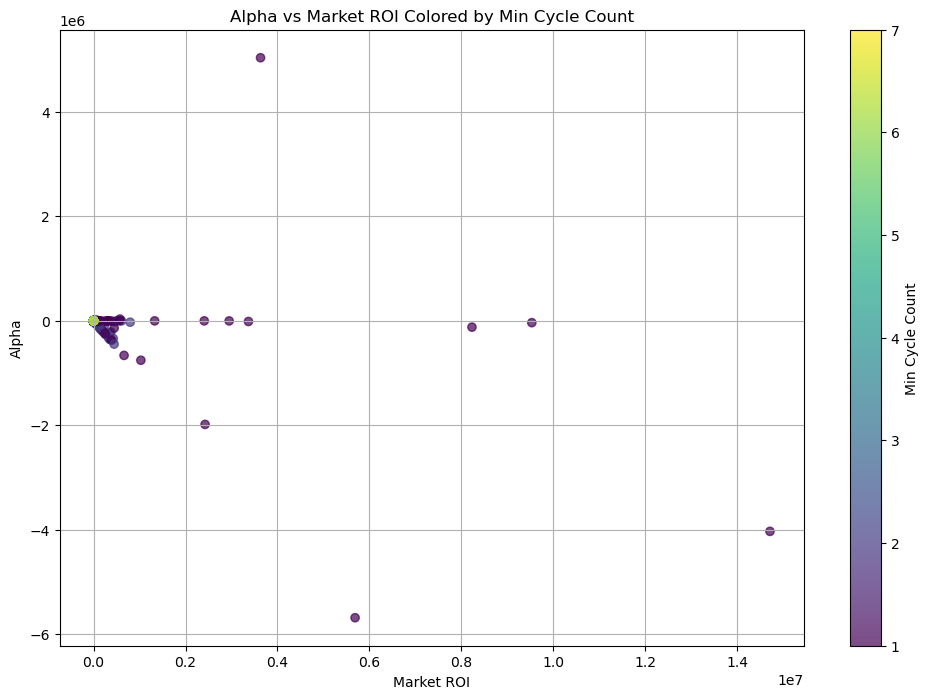

In [15]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    data['Market ROI'],
    data['Alpha'],
    c=data['Min Cycle Count'],
    cmap='viridis',
    alpha=0.7
)
plt.colorbar(scatter, label='Min Cycle Count')
plt.title('Alpha vs Market ROI Colored by Min Cycle Count')
plt.xlabel('Market ROI')
plt.ylabel('Alpha')
plt.grid(True)
plt.show()

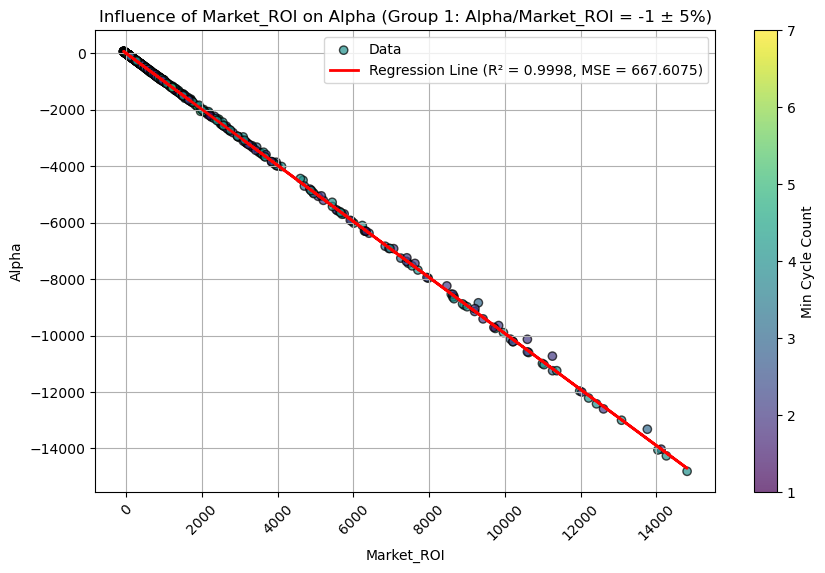

Correlation for Group 1: -0.9999


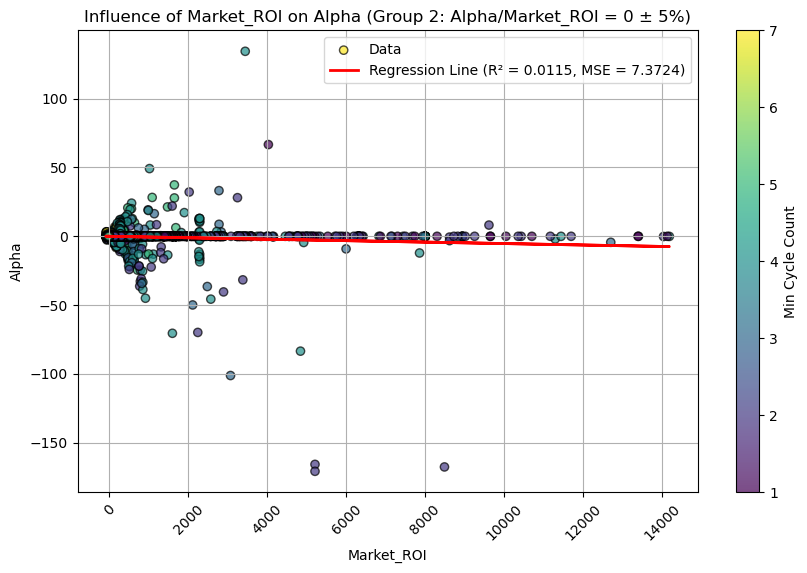

Correlation for Group 2: -0.1073


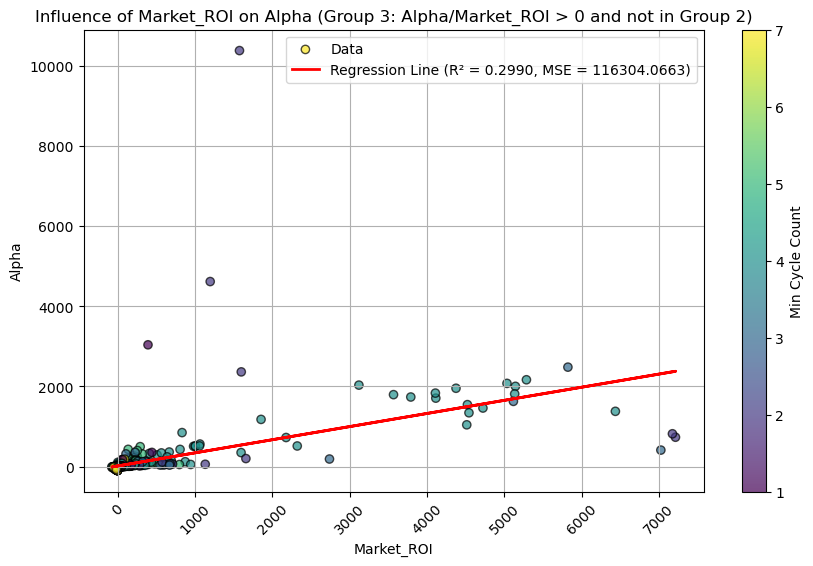

Correlation for Group 3: 0.5468


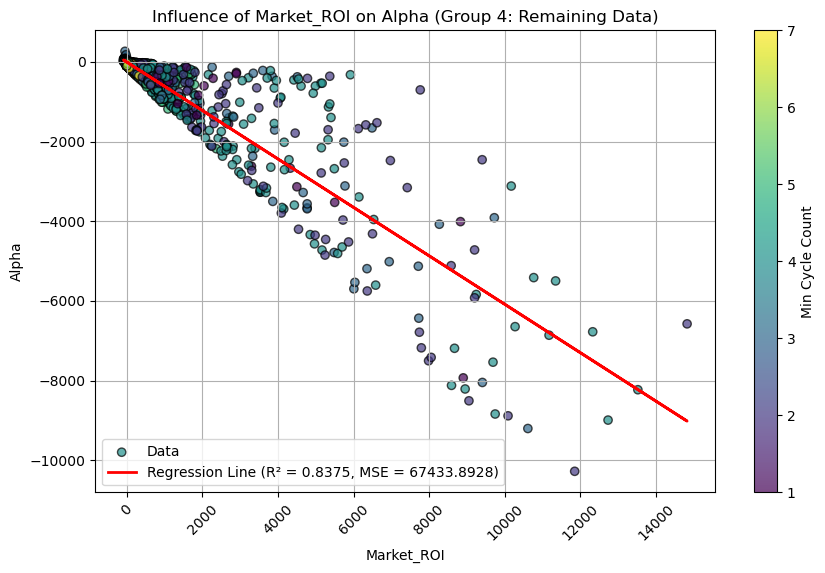

Correlation for Group 4: -0.9152


In [16]:
group_reg = data[data['Market ROI'] <= 15000]
# group_reg = group_reg[group_reg['Alpha'] != 0]

group_1_condition = (group_reg['Alpha'] / group_reg['Market ROI'] >= -1.05) & (group_reg['Alpha'] / group_reg['Market ROI'] <= -0.95)
group_2_condition = (group_reg['Alpha'] / group_reg['Market ROI'] >= -0.05) & (group_reg['Alpha'] / group_reg['Market ROI'] <= 0.05)
group_3_condition = (group_reg['Alpha'] / group_reg['Market ROI'] > 0.05)
group_4_condition = ~(group_1_condition | group_2_condition | group_3_condition)  # The rest of the data

group_1 = group_reg[group_1_condition]
group_2 = group_reg[group_2_condition]
group_3 = group_reg[group_3_condition]
group_4 = group_reg[group_4_condition]

def perform_regression_and_plot_with_color(group, title_suffix):
    X = group['Market ROI'].values.reshape(-1, 1)
    y = group['Alpha'].values

    regression_model = LinearRegression()
    regression_model.fit(X, y)

    y_pred = regression_model.predict(X)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(group['Market ROI'], group['Alpha'], c=group['Min Cycle Count'], cmap='viridis', alpha=0.7, edgecolor='k', label='Data')
    plt.colorbar(scatter, label='Min Cycle Count')
    plt.plot(group['Market ROI'], y_pred, color='red', linewidth=2, label=f'Regression Line (R² = {r2:.4f}, MSE = {mse:.4f})')
    plt.title(f'Influence of Market_ROI on Alpha {title_suffix}')
    plt.xlabel('Market_ROI')
    plt.ylabel('Alpha')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

    correlation = group[['Market ROI', 'Alpha']].corr().iloc[0, 1]
    return correlation

correlation_1 = perform_regression_and_plot_with_color(group_1, "(Group 1: Alpha/Market_ROI = -1 ± 5%)")
print(f"Correlation for Group 1: {correlation_1:.4f}")

correlation_2 = perform_regression_and_plot_with_color(group_2, "(Group 2: Alpha/Market_ROI = 0 ± 5%)")
print(f"Correlation for Group 2: {correlation_2:.4f}")

correlation_3 = perform_regression_and_plot_with_color(group_3, "(Group 3: Alpha/Market_ROI > 0 and not in Group 2)")
print(f"Correlation for Group 3: {correlation_3:.4f}")

correlation_4 = perform_regression_and_plot_with_color(group_4, "(Group 4: Remaining Data)")
print(f"Correlation for Group 4: {correlation_4:.4f}")

# Correlation Matrix

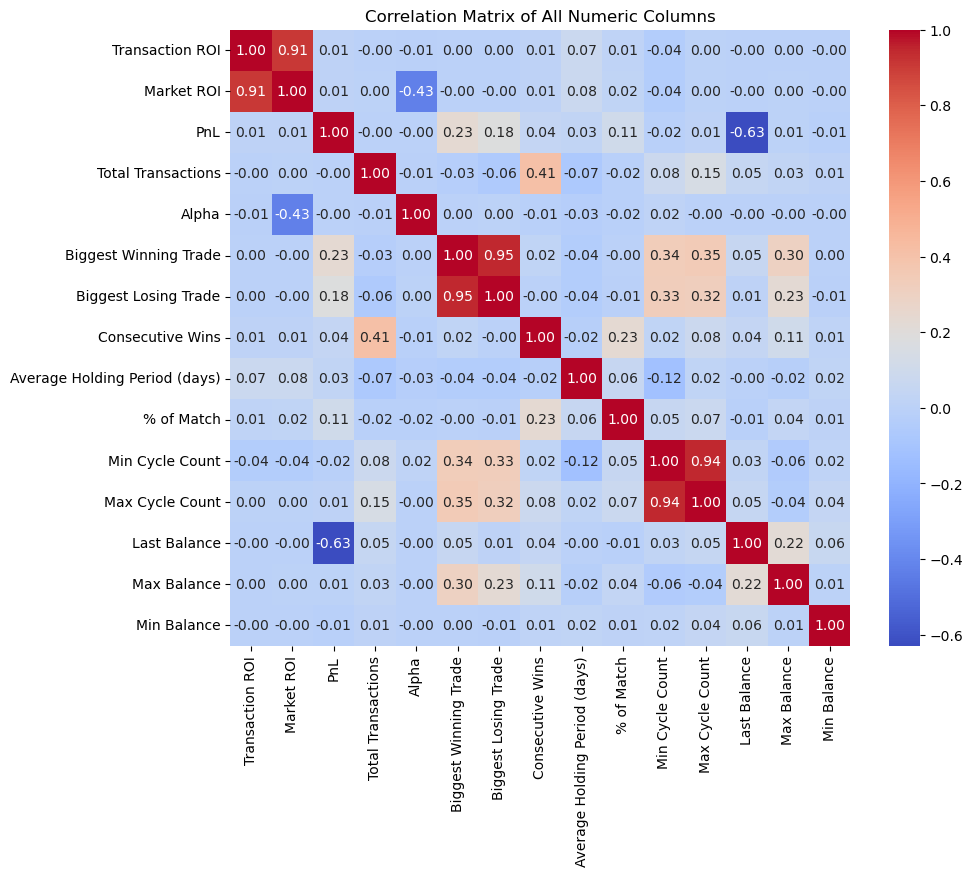

In [18]:
numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Numeric Columns')
plt.show()

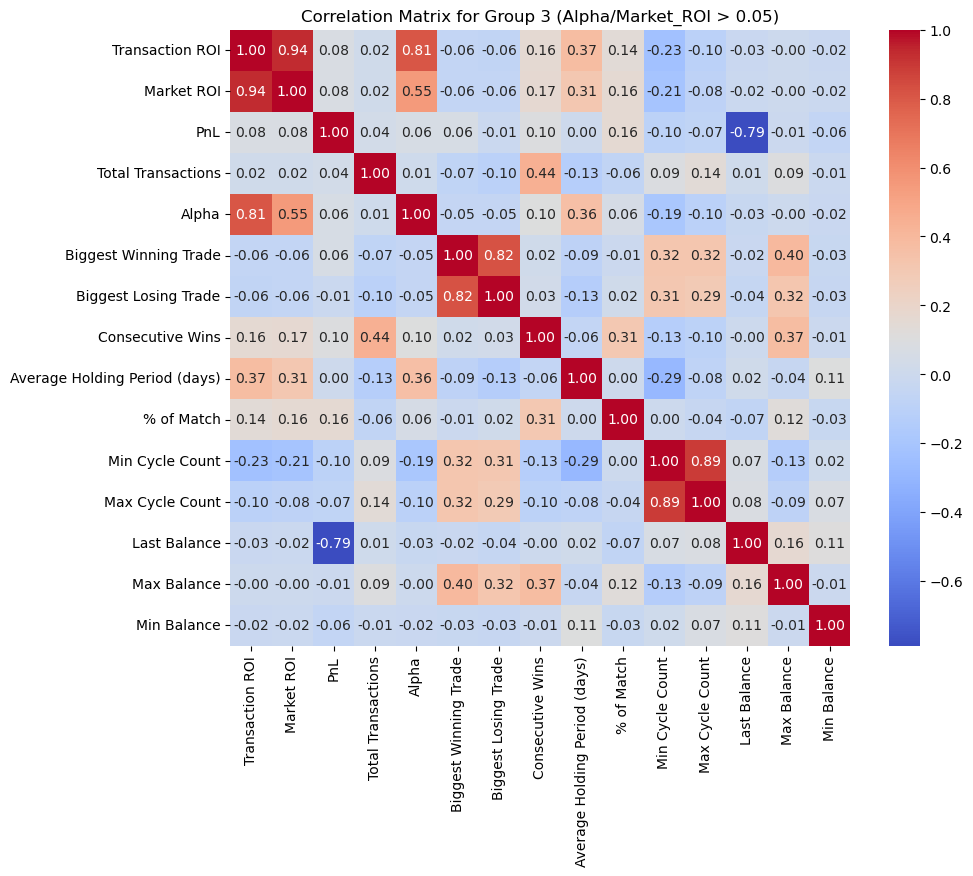

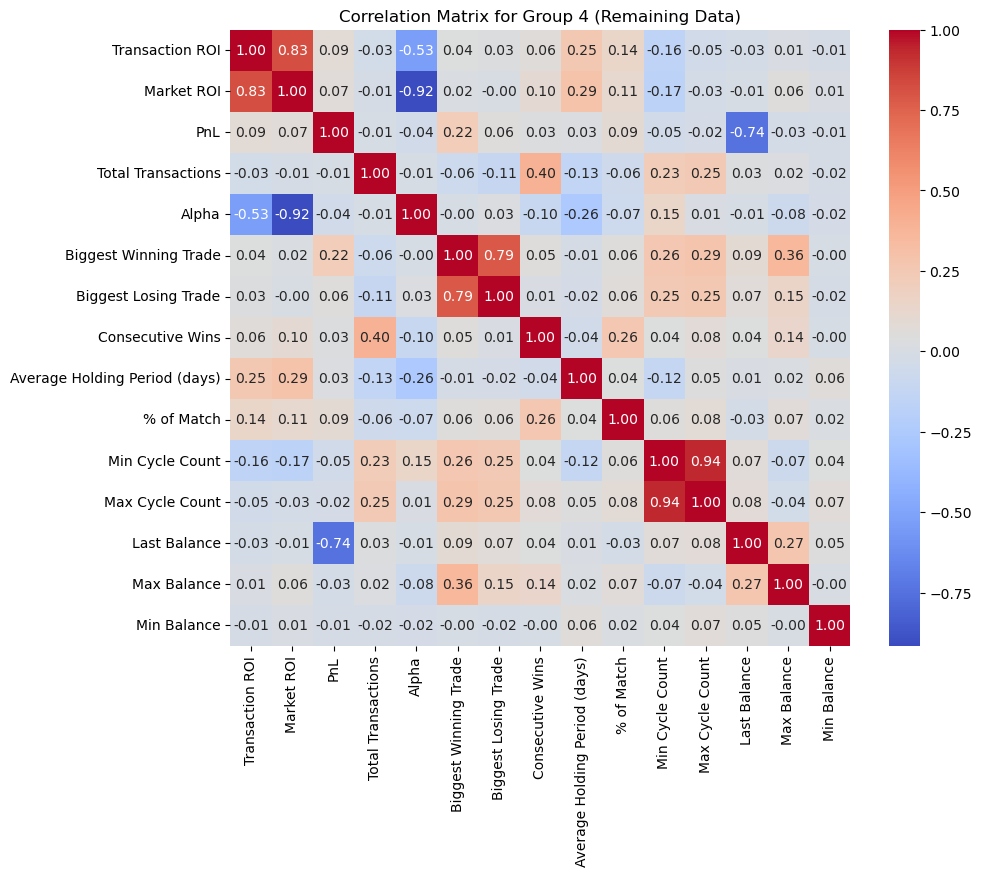

In [19]:
numeric_data_group_3 = group_3.select_dtypes(include=[np.number])
correlation_matrix_group_3 = numeric_data_group_3.corr()

numeric_data_group_4 = group_4.select_dtypes(include=[np.number])
correlation_matrix_group_4 = numeric_data_group_4.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_group_3, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Group 3 (Alpha/Market_ROI > 0.05)')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_group_4, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Group 4 (Remaining Data)')
plt.show()